In [1]:
#!pip install prettytable
import math
import xlrd
import matplotlib.pyplot as plt
from scipy.stats.kde import gaussian_kde
from numpy import linspace
from pylab import plot
import pandas as pd
import numpy as np
from prettytable import PrettyTable
import matplotlib.pyplot as plt

In [12]:
class Lab1M:
    def __init__(self, Array):                     # запускаем данный метод при инициальзации
        self.N=len(Array)                          # Получаем количество элементов
        print ("Num of elements: " + str(self.N))  # Выводим это число на экран
        self.m = 1 + math.log2(self.N)             # Высчитываем количество групп
        print ("m =  " + str(self.m))
        self.m = math.ceil(self.m)
        print ("Num of groups: " + str(self.m))    # Выводим количетсов групп на экран
        self.Group(self.N, self.m)                 # Запускем метод Group для выполнения 1 задания
        
        self.Kernel()                              # Запускаем метод Kernel для выполнения 2 задания
        
        self.CharactTable(self.N, self.m)          # Запускаем метод CharactTable для выполнения 3 задания
        
    def Group(self, N, m):                         # Метод Group высчитывает все необходимые параметры для построения гистограмм и графика ядерной оценки плотности
        self.Del = (max(Array) - min(Array))/(1 + math.log2(self.N))     # Высчитываем интервал
        self.Del = self.Rounding(self.Del)         # Округляем полученный интервал
        print("Gap is " + str(self.Del))           # Выводим его на экран
        
        self.C = []
        self.C.append(min(Array))                  # Заполняем массив границ Первым границей будет минимальное число в выборке
        print ("C0 is " + str(self.C[0]))          # выводим его на экран
        self.i = 0                                 
        while self.i < m - 1:                          # Заполняем масив отсальными границами
            self.C.append(self.Rounding(self.Borders(self.C[self.i], self.Del)))          # с помощью метода Borders находим следующую границу
            print ("C" + str(self.i+1) + " is " + str(self.C[self.i+1]))                  # Выводим её на экран
            self.i=self.i+1
        self.C.append(max(Array))                  # Заполняем массив границ Последней границей будет максимальное число в выборке
        print ("C9 is " + str(self.C[len(self.C) - 1]))          # выводим его на экран
        
        self.CA = []
        self.i = 0
        while self.i < m:                                                                              # Заполняем массив среднего в интервале
            self.CA.append(self.Rounding(self.Average_in_gap(self.C[self.i], self.C[self.i+1])))                      # c помощью метода Average_in_gap находим среднее в интревале для каждого
            print ("Average " + str(self.i) + " - " + str(self.i+1) + " is " + str(self.CA[self.i]))   # Выводим получившееся число на экран
            self.i=self.i+1
        
        self.F = []
        self.i = 0
        while self.i < m:                                                                   # Заполняем массив количества элементов в каждой группе
            self.F.append(self.Num_elmnts_in_group(self.C[self.i], self.C[self.i + 1]))     # с помощью метода Num_elements_in_group получаем искомое для каждой группы
            print("Num elements in group " + str(self.i+1) + " is " + str(self.F[self.i]))  # выводим на экран значение
            self.i=self.i+1
            
        self.RelF = []
        self.i = 0
        for self.i in self.F:            # Заполняем массив относительной частотности для каждой группы
            self.RelF.append(self.Rounding(self.i / N)) # Находим его по формуле
        print ("Relative frequency is ") # Выводим на экран
        print (self.RelF)
        
        self.GA = []
        self.i = 0
        while self.i < m:                                                              # Заполняем массив среднего по группе
            self.GA.append(self.Rounding(self.Group_average(self.C[self.i], self.C[self.i + 1])))     # Находим среднее для каждой группы с помощью метода Group_average
            print("Average in group " + str(self.i+1) + " is " + str(self.GA[self.i])) # Выводим полученные значения на экран
            self.i = self.i+1       
        
        self.NumOfGroup = []
        self.Yoha = 0
        while self.Yoha < m:                                                # Создаём массив числа элементов в группе
            self.NumOfGroup.append(self.Yoha+1)                             
            self.Yoha = self.Yoha + 1
        self.TableCreator(self.C, self.CA, self.GA, self.F, self.RelF, m)   # Заносим данные в таблицу с помощью метода TableCreator
        
        self.PercentRelF = []
        self.K = 0
        for self.K in self.RelF:                                              # Находим процентную долю относительной частотности
            self.PercentRelF.append(self.K*100)                               
            
        self.K = 0
        self.Den = []
        for self.K in self.RelF:                   
            self.Den.append(self.K/self.Del)       
        self.K = 0
        self.Inter = []
        while self.K < m:                                                                          # создаём массив интервалов для вывода их на гистограмме
            self.Inter.append("[" + str(self.C[self.K]) + ';' + str(self.C[self.K + 1]) + ")")     
            self.K = self.K + 1
            
        print ("Histogramma of frequency")
        self.Histogramma1(self.NumOfGroup, self.F)                    # Получаем первую гистограмму с помощью метода Histogramma1
        print ("Histograma of relative frequency in %")
        self.Histogramma2(self.NumOfGroup, self.PercentRelF)           # Получаем вторую гистограмму с помощью метода HIstogramma2
        print ("Histograma of estimation of the probability density")  
        self.Histogramma3(self.Inter, self.Den)                         # Получаем третью гистограмму с помощью метода Histogramma 3
        
        return 0
    
    def Rounding(self, X):                           # Метод, позволяющий округлить число по правилам математики
        return round(X,3)
    #  if (X - math.floor(X) >= 0.5):        
      #      return (math.ceil(X))
      #  else:
       #     return (math.floor(X))
        
    def Borders(self, C1, Del):                   # Мето позволяющий получить вторую границу
        return (C1 + Del)
    
    def Average_in_gap(self, C1, C2):             # Метод, позволяющий получить среднее в интервале
        return ((C1+C2)/2)
    
    def Num_elmnts_in_group(self, C1, C2):        # Метод, позволяющий получить количество элементо в каждой группе
        self.Count=0
        for self.K in Array:
            if ((self.K >= C1) and (self.K < C2)) or ((C2 == 24.8) and (self.K >= C1) and (self.K <= C2)):
                self.Count = self.Count+1   
        return self.Count
    
    def Group_average(self, C1, C2):              # Метод, позволяющий получить среднее по группе
        self.K = 0
        self.Count = 0
        self.Sum = 0
        for self.K in Array:                       
            if (self.K >= C1) and (self.K < C2):   
                self.Sum = self.Sum + self.K       
                self.Count = self.Count+1
        return (self.Sum/self.Count)
        
    def TableCreator(self, C, CA, GA, F, RelF, m):           # Метод позволяющий создать таблицу с помощью библиотеки PrettyTable
        self.th = ['# of group', 'Interval', 'Interval average', 'Group average', 'Frequency', 'Relative frequency']      # Определяем имена полей таблицы
        self.DataArray = []
        self.CC = 0
        while self.CC < m:        # Заполняем таблицу данными
            self.DataArray.extend([self.CC+1,"[" + str(C[self.CC]) + ";" + str(C[self.CC+1]) + ")", CA[self.CC], GA[self.CC], F[self.CC], RelF[self.CC]])
            self.CC=self.CC+1
        self.col = len(self.th)
        self.table = PrettyTable(self.th)
        self.td = self.DataArray
        while self.td:                                 # создаём таблицу 
            self.table.add_row(self.td[:self.col])
            self.td = self.td[self.col:]
        print (self.table)                              # выводим её на экран
        return 0
    
    def Histogramma1(self, Arr1, Arr2):                  # Метод позволяющйи отрисовать первую гистограмму
        plt.title("Histogramma of frequency")
        plt.xlabel("# of group")
        plt.ylabel("Frequency")
        plt.bar(Arr1, Arr2, width = 0.1, color = 'blue')   # атрибуты первой диаграммы толщина столбцов 0.1, цвет красный
        plt.show()
        return 0
    
    def Histogramma2(self, Arr1, Arr2):                    # Метод позволяющий получить вторую гистограмму
        plt.title("Histograma of relative frequency in %")
        plt.xlabel("# of group")
        plt.ylabel("Relative frequency")
        plt.bar(Arr1, Arr2)
        plt.show()
        return 0
    
    def Histogramma3(self, Arr1, Arr2):                        # Метод позволяющий получить третью гистограмму
        plt.figure(figsize=(16, 9), constrained_layout=True)    # Увеличиваем размер гистограммы для коректной отрисовки
        plt.title("Histograma of estimation of the probability density")
        plt.xlabel("Interval")
        plt.ylabel("Dencity")
        plt.bar(Arr1, Arr2, width = 1)                        # Определяем параметры гистограммы: толщина столбцов - 1
        plt.show()
        return 0
    
    def Kernel(self):                                     # Метод позволяющий получить ядерную оценку плотности вероятности
        AH = pd.read_csv('Data.txt', sep = "\t", header = 0, index_col = False)       #  Считываем данные для построения графика
        AH1 = np.asarray(AH['Acceleration'])
        my_density1 = gaussian_kde(AH1)
       #  my_density2 = gaussian_kde(AH1, bw_method = 1) 
        my_density3 = gaussian_kde(AH1, bw_method = 0.1) 
        x = linspace(min(AH['Acceleration']), max(AH['Acceleration']), 100) 
        print ("Kernel Density Estimation:")
        plot(x, my_density1(x), 'r')
        plot(x, my_density3(x), 'r')               # выводим график на экран
        return 0
    
    def CharactTable(self, N, m):                          # Метод, позволяющий получить таблицу выборочных характеристик распределения
        self.summator = 0
        for self.e in Array:                                  # Получаем все необходимые характеристики по указанным формулам
            self.summator = self.summator + self.e
        self.X_Mid = self.summator / N
        self.Med = np.percentile(Array, 50)
        self.R = max(Array) - min(Array)
        self.IQR = np.percentile(Array, 75) - np.percentile(Array, 25)
        self.summator = 0
        self.e = 0
        for self.e in Array:
            self.summator = self.summator + abs(self.e - self.X_Mid)
        self.D_Mid = self.summator / N
        self.summator = 0
        self.e = 0
        for self.e in Array:
            self.summator = self.summator + (self.e - self.X_Mid)**2
        self.S = math.sqrt(self.summator / (N - 1))
        self.Disp = self.S * self.S
        self.V = (self.S / self.X_Mid) * 100
        self.th = ['Sample characteristics', 'Values']                    #
        self.td = ['Mean', self.Rounding(self.X_Mid), 'Median', self.Rounding(self.Med), 'Swipe variation', 
                   self.Rounding(self.R), 'Quartile scope', self.Rounding(self.IQR), 'Average linear deviation', 
                   self.Rounding(self.D_Mid), 'Mean square deviation', self.Rounding(self.S), 'Dispersion', 
                   self.Rounding(self.Disp), 'The coefficient of variation', self.Rounding(self.V)]
        self.col = len(self.th)
        self.table = PrettyTable(self.th)
        while self.td:
            self.table.add_row(self.td[:self.col])
            self.td = self.td[self.col:]
        print (self.table)                             # Выводим полученную таблицу на экран
        return 0
        

[21.5, 14.4, 19.4, 18.6, 16.4, 15.5, 13.2, 12.8, 19.2, 18.2, 15.8, 15.4, 17.2, 17.2, 15.8, 16.7, 18.7, 15.1, 13.2, 13.4, 11.2, 13.7, 16.5, 14.2, 14.7, 14.5, 14.8, 16.7, 17.6, 14.9, 15.9, 13.6, 15.7, 15.8, 14.9, 16.6, 15.4, 18.2, 17.3, 18.2, 16.6, 15.4, 13.4, 13.2, 15.2, 14.9, 14.3, 15.0, 13.0, 14.0, 15.2, 14.4, 15.0, 20.1, 17.4, 24.8, 22.2, 13.2, 14.9, 19.2, 14.7, 16.0, 11.3, 12.9, 13.2, 14.7, 18.8, 15.5, 16.4, 16.5, 18.1, 20.1, 18.7, 15.8, 15.5, 17.5, 15.0, 15.2, 17.9, 14.4, 19.2, 21.7, 23.7, 19.9, 21.8, 13.8, 17.3, 18.0, 15.3, 11.4, 12.5, 15.1, 14.3, 17.0, 15.7, 16.4, 14.4, 12.6, 12.9, 16.9, 16.4, 16.1, 17.8, 19.4, 17.3, 16.0, 14.9, 16.2, 20.7, 14.2, 15.8, 14.4, 16.8, 14.8, 18.3, 20.4, 15.4, 19.6, 12.6, 13.8, 15.8, 19.0, 17.1, 16.6, 19.6, 18.6, 18.0, 16.2, 16.0, 18.0, 16.4, 20.5, 15.3, 18.2, 17.6, 14.7, 17.3, 14.5, 14.5, 16.9, 15.0, 15.7, 16.2, 16.4, 17.0, 14.5, 14.7, 13.9, 13.0, 17.3, 15.6, 24.6, 11.6, 18.6, 19.4]
Min 11.2
Max 24.8
Num of elements: 155
m =  8.276124405274238
Num of 

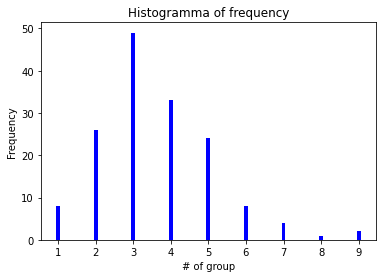

Histograma of relative frequency in %


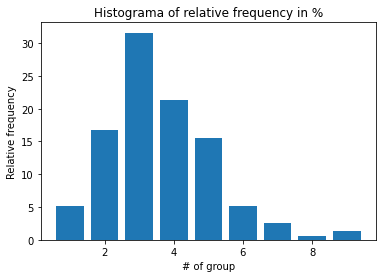

Histograma of estimation of the probability density


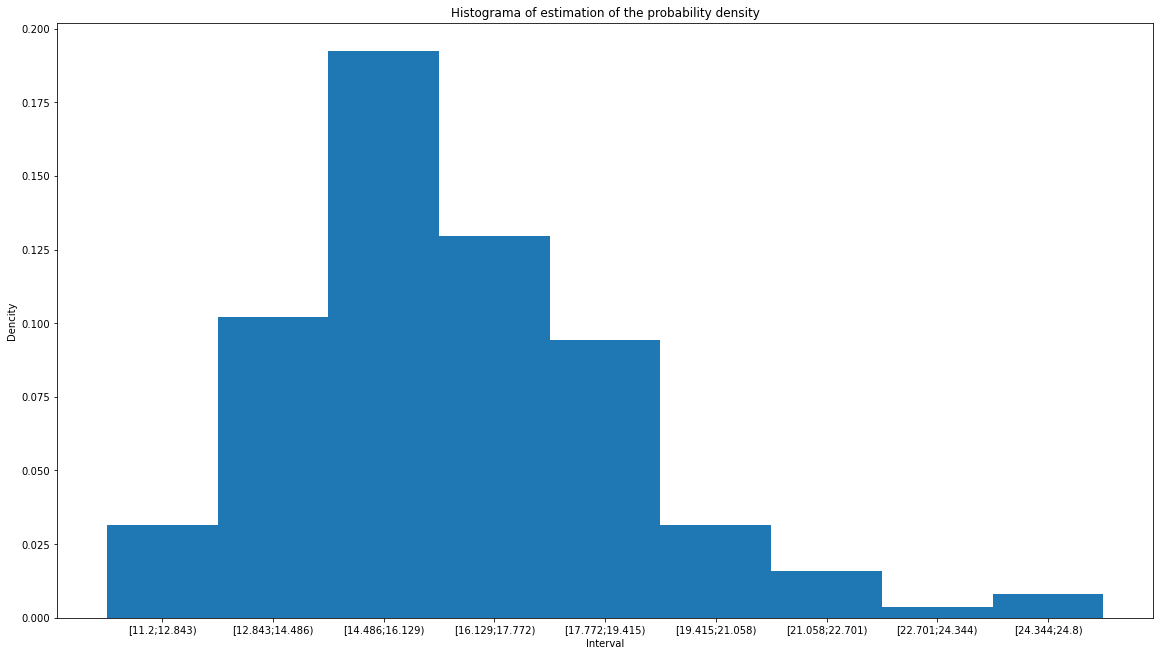

Kernel Density Estimation:
+------------------------------+--------+
|    Sample characteristics    | Values |
+------------------------------+--------+
|             Mean             | 16.276 |
|            Median            |  15.8  |
|       Swipe variation        |  13.6  |
|        Quartile scope        |  3.0   |
|   Average linear deviation   |  1.95  |
|    Mean square deviation     |  2.52  |
|          Dispersion          | 6.351  |
| The coefficient of variation | 15.484 |
+------------------------------+--------+


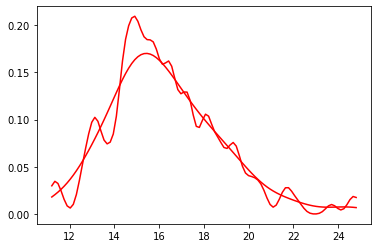

In [13]:
rb=xlrd.open_workbook('Data.xls' ,formatting_info=True)               #Считываем данные из файла Excel
sheet=rb.sheet_by_index(0)                # Выбираем лист в файле
Array=[]
i=0
for i in range(sheet.nrows):              # Заносим полученные из файла данные в массив Array
    row = sheet.row_values(i)
    if i>1:
        Array.append(row[1])
print(Array)
print ("Min " + str(min(Array)))          # Выводим минимальное значение параметра их массива
print ("Max " + str(max(Array)))          # Выводим максимальное значение параметра из масива 



Lab1M(Array)                              # Вызываем класс Lab1M в котором и будут обрабатываться данные

In [4]:
coff = [0.0,0.01,0.0,0.35,0.98,0.001,0.0]
coff = np.asarray(coff) * 1.0
print(coff)
str_lst = ['1.1', '2.1', '3']
print (str_lst)
int_lst = [float(x) for x in str_lst]
print (int_lst)

[0.    0.01  0.    0.35  0.98  0.001 0.   ]
['1.1', '2.1', '3']
[1.1, 2.1, 3.0]
